# 7. 합성곱 신경망(CNN)

> 이번장에서 배운 내용
> * __합성곱 계층(Convolutional Layer)__
> * __풀링 계층(Pooling Layer)__
> * 위 두 계층은 __im2col(이미지를 행렬로 전개하는 함수)__을 이용하면 효율적으로 구현할 수 있다.
> * CNN을 시각화해보면 계층이 깊어질수록 고급 정보가 추출되는 모습을 확인할 수 있다.
> * 대표적인 CNN에는 LeNet과 AlexNet이 있다.

## 전체 구조

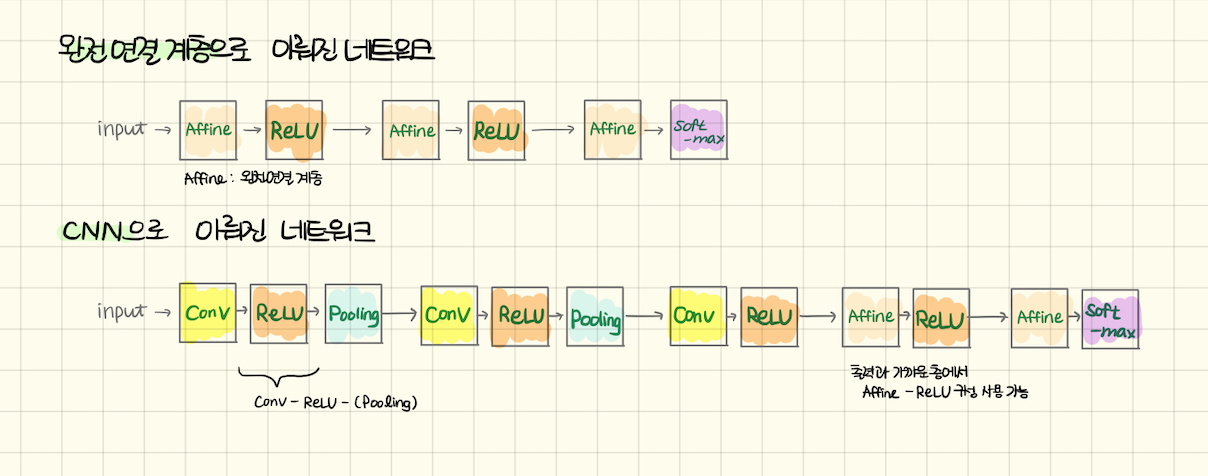

* CNN에서는 __합성곱 계층(Convolutional Layer)__와 __풀링 계층(Pooling Layer)__가 추가된다.

## 합성곱 계층

### 완전연결 계층의 문제점

* 완전연결 계층의 문제점은 __'데이터의 형상이 무시'__된다는 것
    * 입력 데이터가 이미지인 경우, 이미지는 통상 세로*가로*채널(색상)으로 구성된 3차원 데이터이다.
    * 이 3차원 형상에는 소중한 공간적 정보가 담겨 있고, 3차원 속에서 의미를 갖는 본질적인 패턴이 숨어있을 수 있다.
        * (ex.1)공간적으로 가까운 픽셀은 값이 비슷할 수 있다.
        * (ex.2)RGB의 각 채널은 서로 밀접하게 관련되어 있을 수 있다.
        * (ex.3)거리가 먼 픽셀끼리는 별 연관이 없을 수 있다.
    * 완전연결 계층에 입력할 때는 3차원 데이터를 평평한 1차원 데이터로 평탄화해주어야 한다.

* 합성곱 계층은 __형상을 유지__한다.
    * 이미지도 3차원 데이터로 입력받으며, 다음 계층에도 3차원 데이터로 전달한다.
    * 그러므로 CNN에서는 이미지처럼 형상을 가진 데이터를 제대로 이해할 가능성이 있는 것이다.

* CNN에서는 합성곱 계층의 입출력 데이터를 __특징 맵(feature map)__ 이라고도 한다.
    * 합성곱 계층의 입력 데이터: 입력 특징 맵(input feature map)
    * 합성곱 계층의 출력 데이터: 출력 특징 맵(output feature map)

### 합성곱 연산

* 합성곱 계층에서의 합성곱 연산은 이미지 처리에서 말하는 __필터 연산__에 해당한다.
* 합성곱 연산은 입력 데이터에 __필터(혹은 커널)__를 적용한다.
* 필터의 윈도우(window)를 일정 간격으로 이동해가며 입력 데이터에 적용한다.
* 입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구한다.
    * 이를 __단일 곱셉-누산(fused-multiply-add, FMA)__라고 한다.
* 그 결과를 출력의 해당 장소에 저장한다.   
<br>   
* 완전연결 신경망에는 가중치 매개변수와 편향이 존재하는데, __CNN에서는 필터의 매개변수가 그동안의 '가중치'에 해당한다.__
* CNN에서도 __편향__이 존재한다.

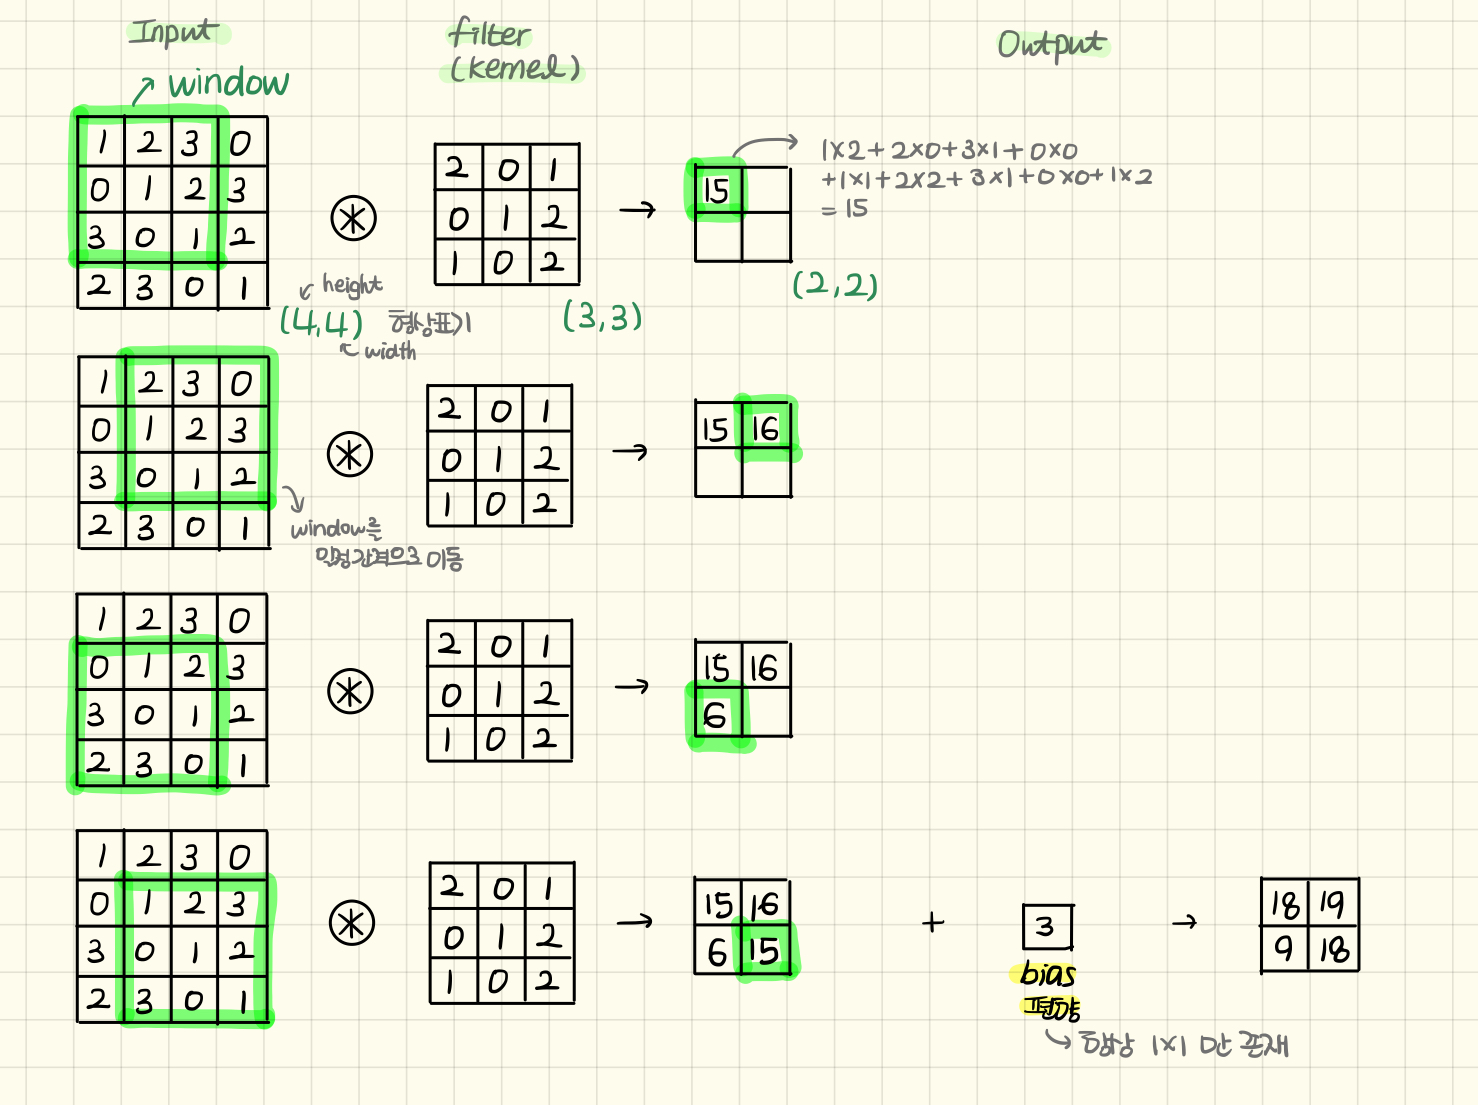

### 패딩(padding)

* 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(ex. 0)으로 채우기도 하는데, 이를 __패딩__이라 한다.
* 아래에서는 패딩을 1로 설정했지만, 2나 3 등 원하는 정수로 설정할 수 있다.
    * 만약 (4,4) 입력 데이터에 패딩을 2로 설정하면 입력 데이터 크기는 (8,8)이 된다.
* 패딩은 주로 __출력 크기를 조정할 목적__으로 사용한다.
    * 예를 들어, (4,4) 입력 데이터에 (3,3) 필터를 적용하면 출력은 (2,2)가 되어, 입력보다 2만큼 줄어든다.
    * 결국 합성곱 연산을 계속 거치면 어느 시점에서는 출력 크기가 1이 되어버리는 문제가 발생한다.
        * 패딩은 입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달할 수 있다.

### 스트라이드(stride)

* 필터를 적용하는 위치의 간격을 __스트라이드__라고 한다.
* 스트라이드를 2로 하면 필터를 적용하는 윈도우가 두 칸씩 이동한다.

* 스트라이드를 키우면 출력 크기는 작아진다.
* 패딩을 크게 하면 출력 크기는 커진다.
* 위를 고려하면, 출력 크기는 아래 식으로 계산할 수 있다.

$$OH = {{H + 2P - FH}\over{S}}+1$$

$$OW = {{W + 2P - FW}\over{S}}+1$$

$$입력 크기=(H,W)$$
$$필터 크기=(FH,FW)$$
$$출력 크기=(OH,OW)$$
$$패딩=P$$
$$스트라이드=S$$

### 3차원 데이터의 합성곱 연산

* 이미지는 3차원 데이터이기 때문에, 3차원 데이터를 다루는 합성곱 연산이 필요하다.
* 2차원일 때와 다른 점은 길이 방향(채널 방향)으로 특징 맵이 늘어났다는 점이다.
* 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻는다.
* 3차원 합성곱 연산에서 주의할 점은 __입력 데이터의 채널 수__와 __필터의 채널 수__가 같아야 한다는 점이다.
    * 필터 자체의 크기는 원하는 값으로 설정할 수 있다.
    * 단, 모든 채널의 필터가 같은 크기여야 한다.

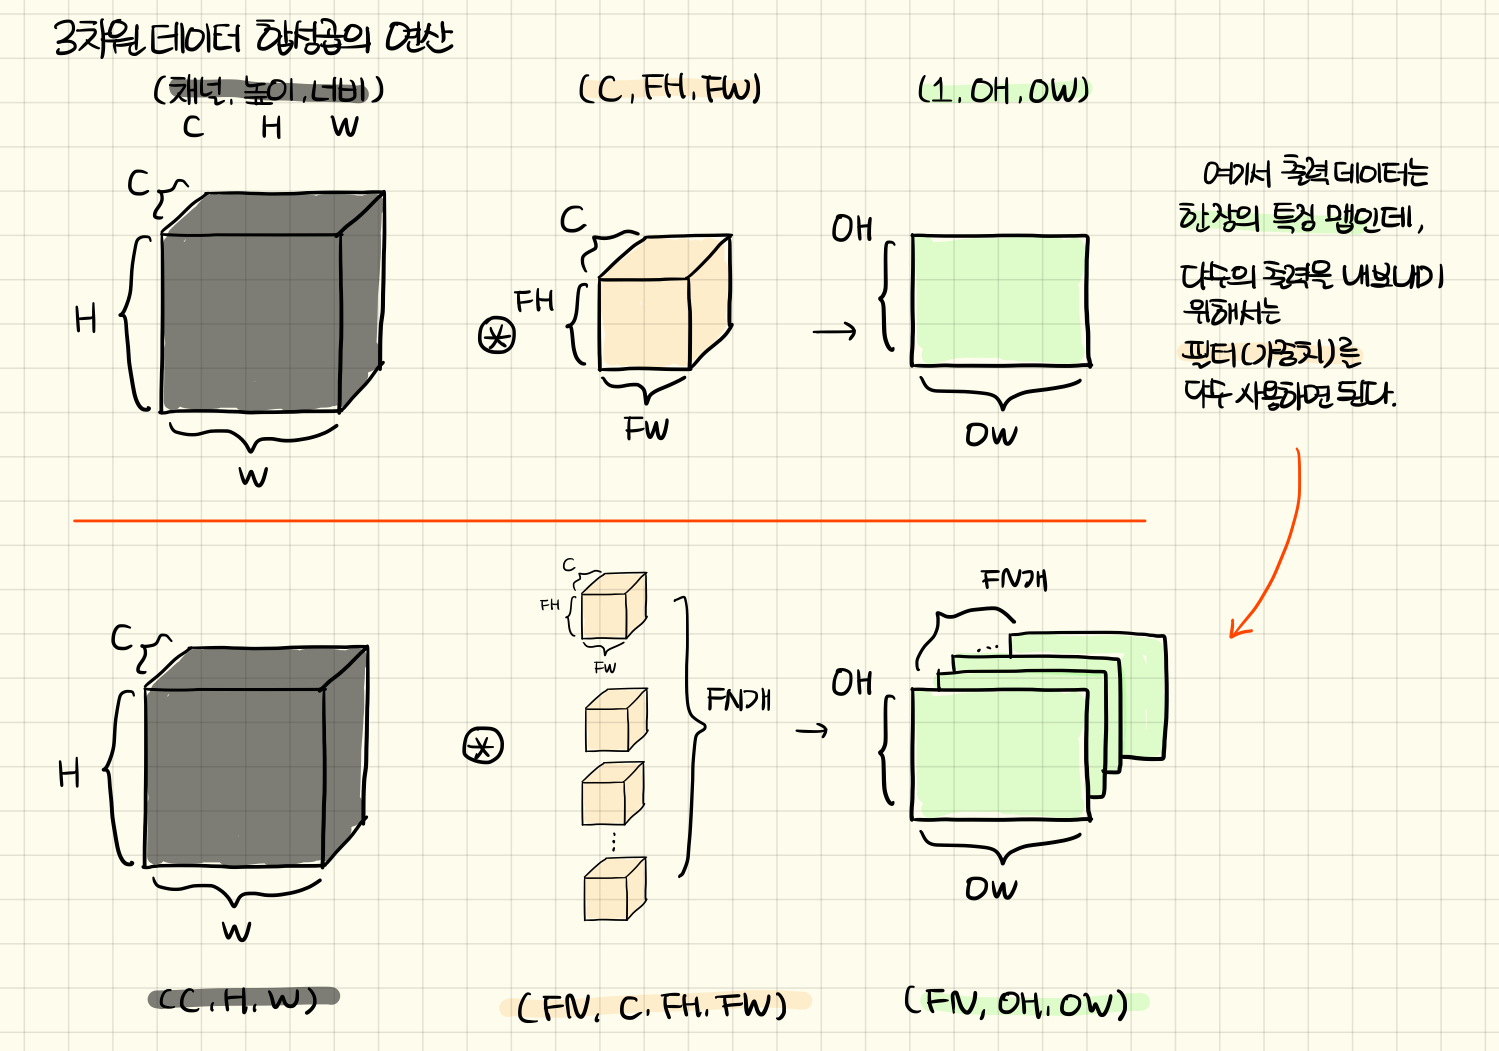

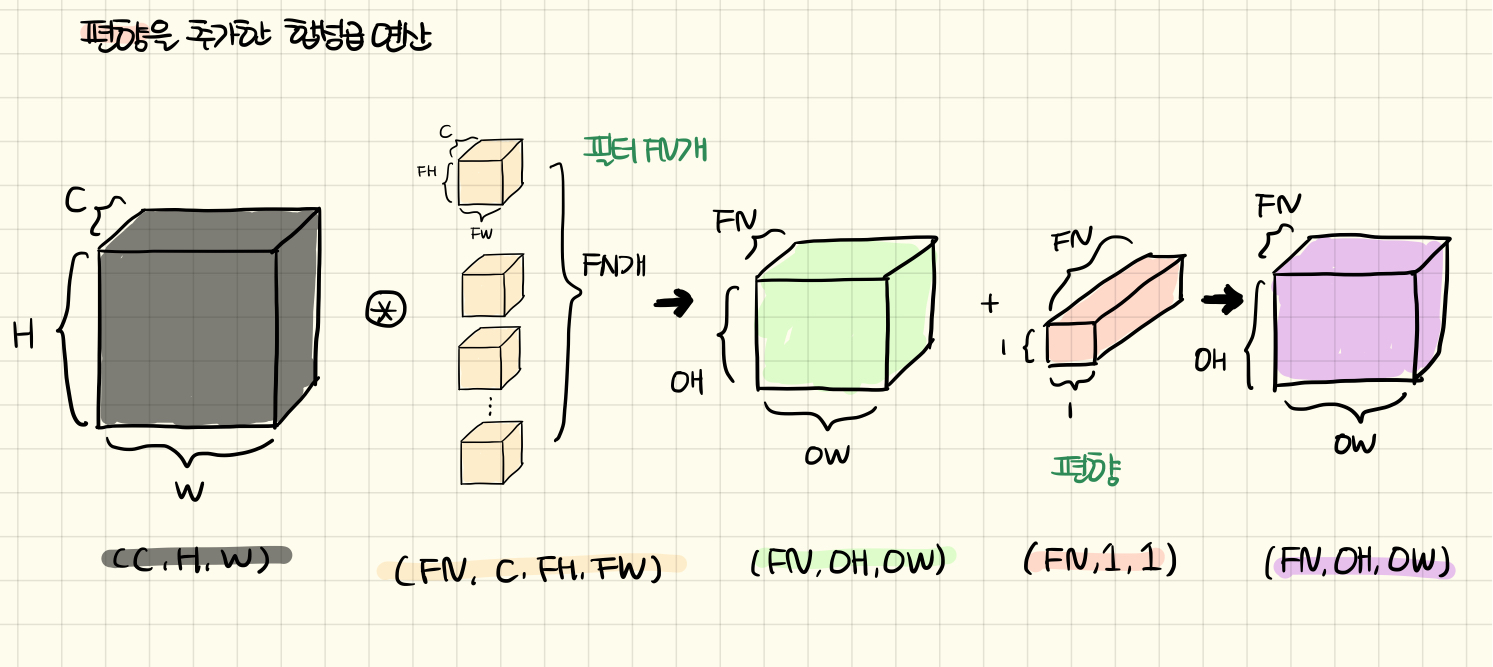

### 배치 처리

* 각 계층을 데이터의 차원을 하나 늘려 4차원 데이터로 저장
    * (데이터 수, 채널 수, 높이, 너비)
* 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이뤄진다.
    * 즉, N회분의 처리를 한 번에 수행한다.

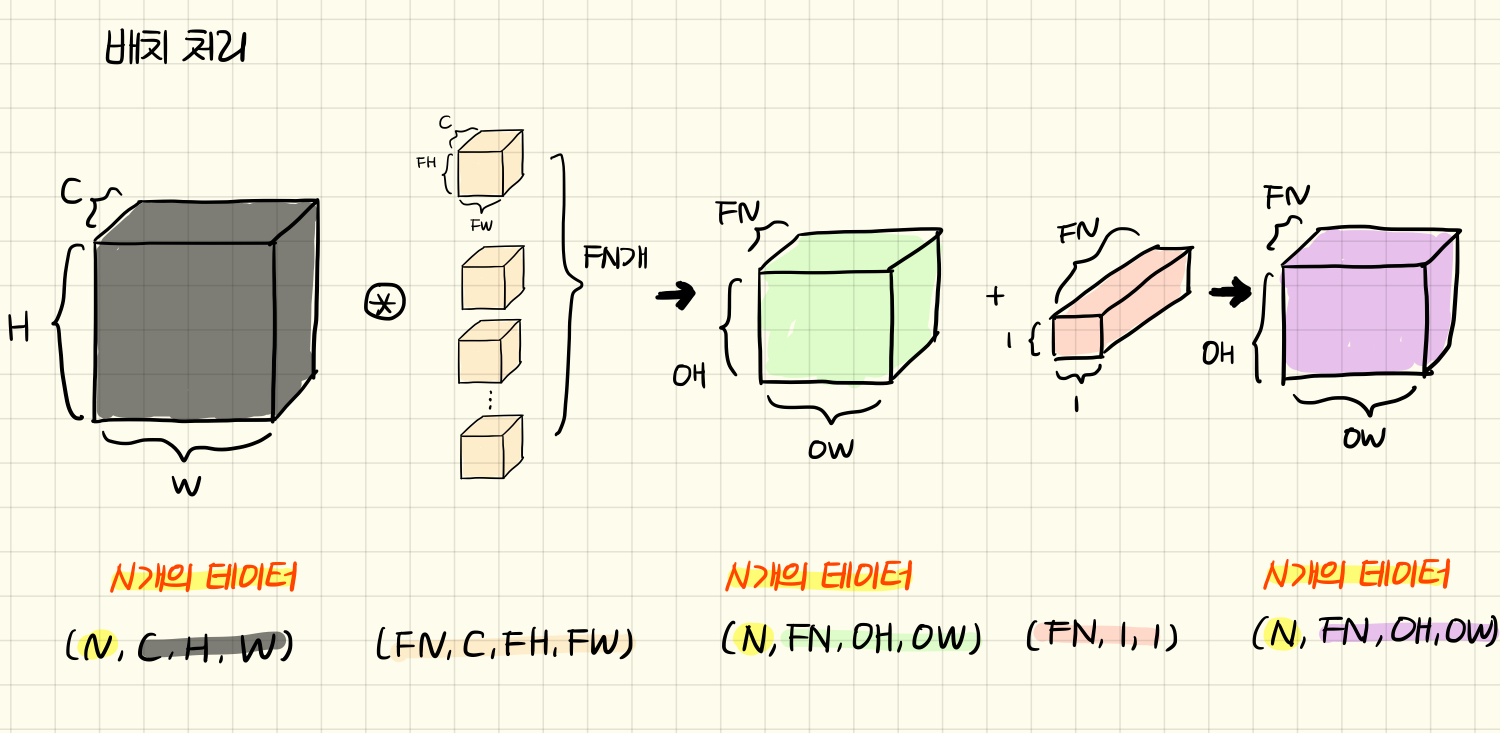

## 풀링 계층

* 풀링은 세로*가로 방향의 공간을 줄이는 연산이다.
* 이미지 인식 분야에서는 주로 최대 풀링(max pooling)을 사용하는데, 평균 풀링(average pooling) 등이 있다.
    * 최대 풀링은 대상 영역에서 최댓값을 취하는 연산
    * 평균 풀링은 대상 영역에서 평균을 계산하는 연산
* 풀링의 윈도우 크기와 스트라이드는 같은 값으로 설정하는 것이 보통이다.

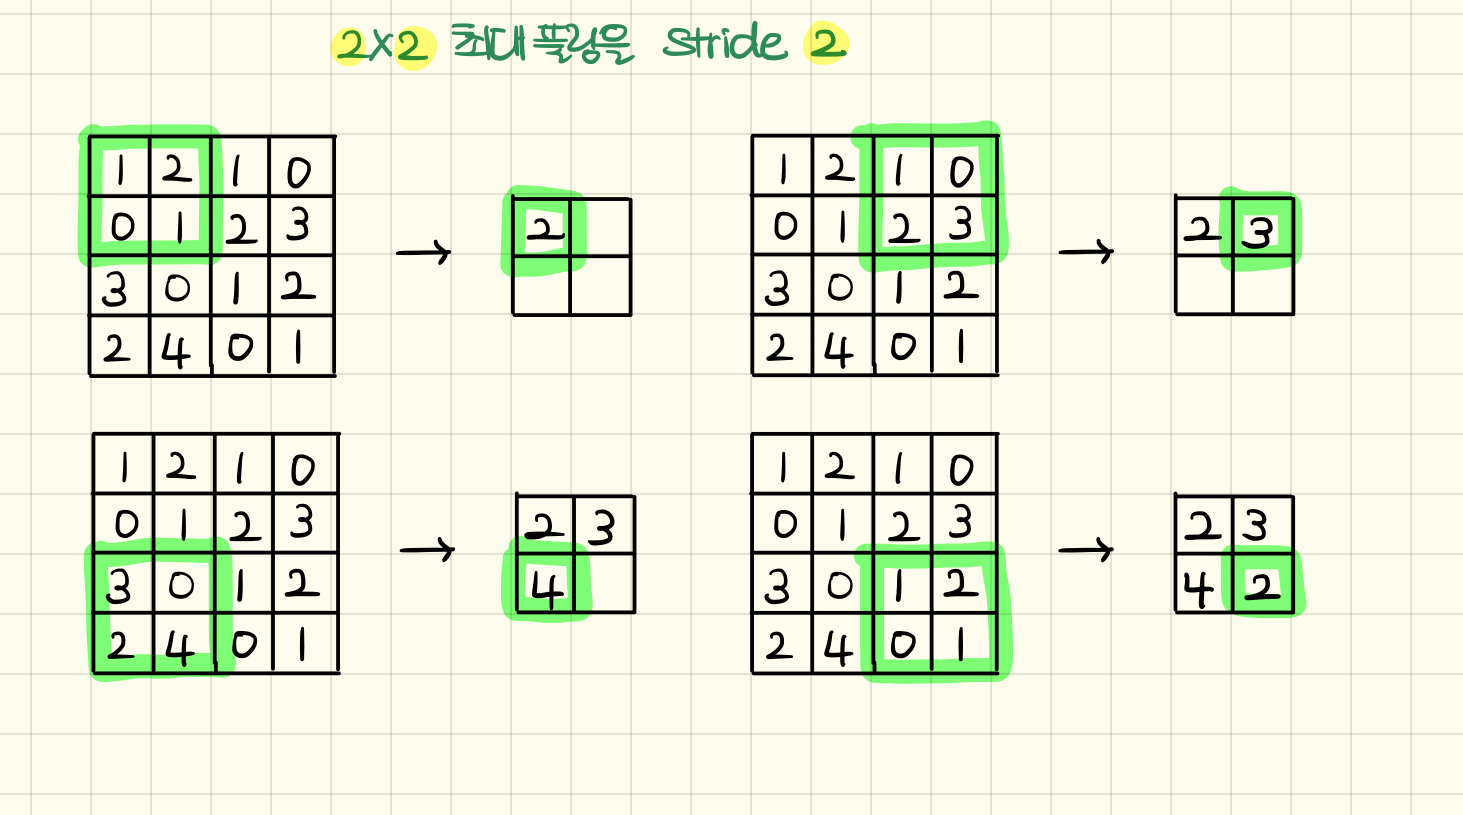

### 풀링 계층의 특징

* 학습해야할 매개변수가 없다.
    * 풀링은 대상 영역에서 최댓값이나 평균을 취하는 명확한 처리
* 채널 수가 변하지 않는다.
    * 풀링 연산은 입력 데이터의 채널 수 그대로 출력 데이터로 내보낸다.
* 입력의 변화에 영향을 적게 받는다(강건하다).
    * 입력 데이터가 조금 변해도 풀링의 결과는 잘 변하지 않는다.

## 합성곱/풀링 계층 구현하기

### 4차원 배열

In [1]:
# CNN에서 계층 사이를 흐르는 데이터는 4차원
# (10, 1, 28, 28) -> 높이 28, 너비 28, 채널 1개인 데이터가 10개
import numpy as np

x = np.random.rand(10, 1, 28, 28)
x.shape

(10, 1, 28, 28)

In [2]:
# 10개의 데이터 중, 첫 번째 데이터에 접근
x[0].shape

(1, 28, 28)

In [3]:
# 10개의 데이터 중, 두 번째 데이터에 접근
x[1].shape

(1, 28, 28)

In [4]:
# 첫 번째 데이터의 첫 채널의 공간 데이터
x[0, 0]

array([[0.71522599, 0.75858748, 0.46007533, 0.64025705, 0.30555114,
        0.48399172, 0.70856749, 0.22524267, 0.14267753, 0.9081019 ,
        0.21169638, 0.25313166, 0.92740102, 0.74054852, 0.83285626,
        0.68217367, 0.86899376, 0.67547253, 0.31468601, 0.82145727,
        0.19382807, 0.04822344, 0.44056818, 0.90876783, 0.90706437,
        0.17573816, 0.45939585, 0.49131998],
       [0.80740426, 0.35253622, 0.99114001, 0.32036617, 0.90924547,
        0.66926088, 0.51020657, 0.11565562, 0.13842518, 0.06691089,
        0.37461588, 0.34459444, 0.29408021, 0.10873508, 0.16446011,
        0.71242961, 0.38825297, 0.02383518, 0.5230483 , 0.8688685 ,
        0.27027004, 0.14737749, 0.17008037, 0.42944761, 0.67195062,
        0.1092001 , 0.94066782, 0.23786766],
       [0.64829546, 0.73568648, 0.54815597, 0.32350571, 0.19195731,
        0.10367619, 0.65677945, 0.41217247, 0.51711029, 0.64271273,
        0.75952574, 0.63861733, 0.74596813, 0.8312704 , 0.77412576,
        0.30375151, 0.9568

### im2col로 데이터 전개하기

* im2col은 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는(펼치는) 함수
    * 입력 데이터에서 필터를 적용하는 영역(3차원 블록)을 한 줄로 늘어놓는다.
* 필터를 세로로 1열로 전개하고, im2col이 전개한 데이터와 행렬 곱을 계산, 마지막으로 출력 데이터를 4차원으로 변형(reshape)한다.

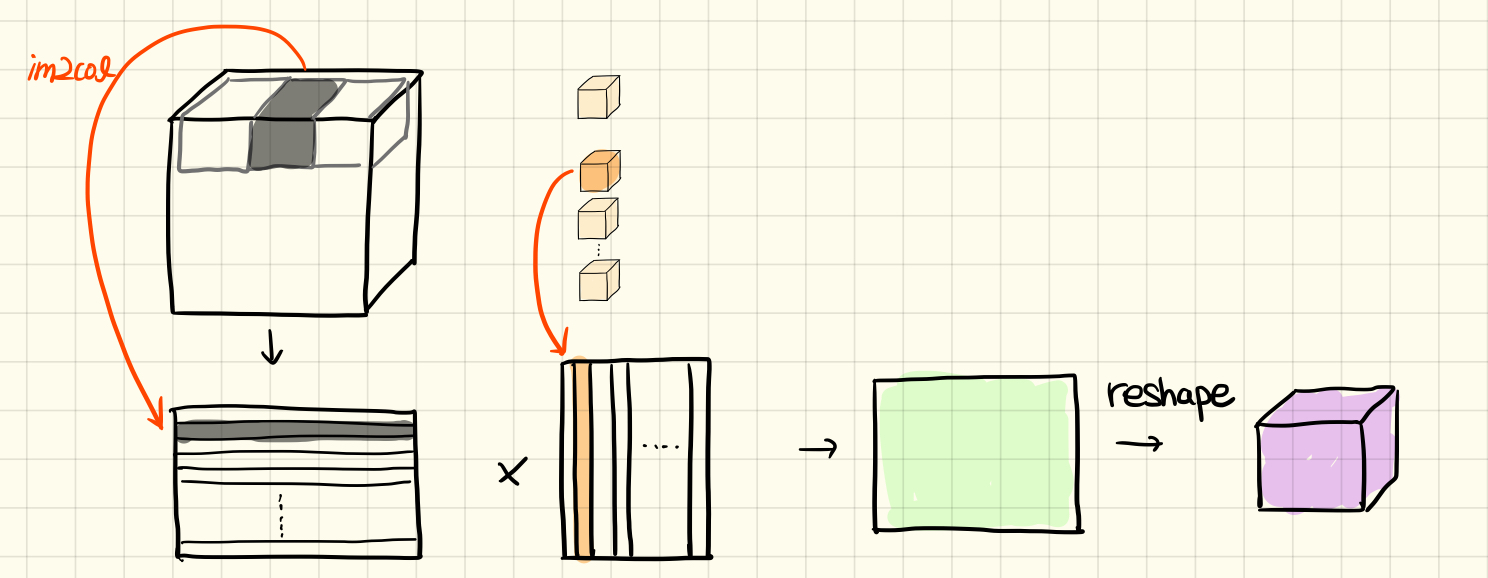

### 합성곱 계층 구현하기

In [5]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).
    
    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩
    
    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [7]:
x1 = np.random.rand(1, 3, 7, 7) # 데이터 수, 채널 수, 높이, 너비
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape) # (9, 75) 75=(채널 3개, 5*5 데이터)

(9, 75)


In [9]:
x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape) # (90, 75)

(90, 75)


In [10]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape # FN: 필터의 개수, C: 채널, FH: 필터 높이, FW: 필터 너비
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2 * self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2 * self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # 필터 전개
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        return out

### 풀링 계층 구현하기

* 풀링 계층 구현에서도 합성곱 계층과 마찬가지로 Im2col을 사용해 입력 데이터를 전개한다.
* 단, 풀링의 경우엔 채널 쪽이 독립적이라는 점이 합성곱 계층 때와 다르다.

In [11]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # 입력 데이터 전개
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        # 최댓값
        out = np.max(col, axis=1)
        
        # reshape
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        return out

## CNN 구현하기

* Conv -> ReLU -> Pooling -> Affine -> ReLU -> Affine -> Softmax

#### 활용되는 함수들

In [14]:
class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        ### 합성곱 계층의 하이퍼파라미터 ###
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        
        ### 합성곱 계층의 출력 크기 계산 ###
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / \
                            filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))
        
        ### 학습에 필요한 매개변수 초기화###
        self.params = {}
        # 1번째 층의 합성곱 계층의 가중치, 편향
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        # 2번째 층의 완전연결 계층의 가중치, 편향
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        # 3번째 층의 완전연결 계층의 가중치, 편향
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        ### CNN 구성 계층 ###
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                           self.params['b1'],
                                           self.params['stride'],
                                           self.params['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        self.last_layer = SoftmaxWithLoss()

In [15]:
def predict(self, x):
    for layer in self.layers.values():
        x = layer.forward()
    return x

def loss(self, x, t):
    y = self.predict(x)
    return self.last_layer.forward(y, t)

In [16]:
### 오차역전파법으로 기울기를 구하는 구현 ###
def gradient(self, x, t):
    # 순전파
    self.loss(x, t)
    
    # 역전파
    dout = 1
    dout = self.last_layer.backward(dout)
    
    layers = list(self.layers.values())
    layeres.reverse()
    for layer in layers:
        dout = layer.backward(dout)
        
    # 결과 저장
    grads = {}
    grads['W1'] = self.layers['Conv1'].dW
    grads['b1'] = self.layers['Conv1'].db
    grads['W2'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W3'] = self.layers['Affine2'].dW
    grads['b3'] = self.layers['Affine2'].db
    
    return grads

#### 실행

train loss:2.2991227148691604
=== epoch:1, train acc:0.251, test acc:0.19 ===
train loss:2.295978863743638
train loss:2.2909333647753773
train loss:2.2850178576707187
train loss:2.273978072002693
train loss:2.263563663218034
train loss:2.252385638532998
train loss:2.2146997789633476
train loss:2.1887854346848243
train loss:2.188009854814559
train loss:2.1374747093263435
train loss:2.12829172436234
train loss:2.1028597400370037
train loss:2.0404510841243
train loss:2.027676199058368
train loss:1.8816157248736087
train loss:1.8826900104680808
train loss:1.8357331936792889
train loss:1.7081387620883823
train loss:1.6594915797241274
train loss:1.5315984670066514
train loss:1.4298383848442766
train loss:1.3486091338163555
train loss:1.2827285205410572
train loss:1.1871787629657207
train loss:1.1039865446888684
train loss:1.1722269398419747
train loss:0.9324197428829848
train loss:0.9581266884275693
train loss:0.9661460619185256
train loss:0.872815675207734
train loss:1.043440736079865
train

train loss:0.23127799127766172
train loss:0.13805685841884954
train loss:0.19110658491218216
train loss:0.2535109981602111
train loss:0.17663035197657184
train loss:0.22596452469807513
train loss:0.23173520937651498
train loss:0.11025053095407002
train loss:0.18449963340632938
train loss:0.12880316472415285
train loss:0.2646864851279066
train loss:0.21244550290303735
train loss:0.153511857580522
train loss:0.17951455610231307
train loss:0.29590845344571887
train loss:0.2218491385457
train loss:0.19328795376492125
train loss:0.35057493996974154
train loss:0.2057336978712336
train loss:0.2321279517562551
train loss:0.23151170154136108
train loss:0.17492565118792947
train loss:0.3162629900440282
train loss:0.2000334587023345
train loss:0.2753646339389848
train loss:0.31042293728975945
train loss:0.3667276719047552
train loss:0.2239964420769437
train loss:0.11600634739545798
train loss:0.19972551409243397
train loss:0.23245269458591733
train loss:0.2372515796473875
train loss:0.21071885646

train loss:0.15621460657034308
train loss:0.14539930608366464
train loss:0.11415420103756592
train loss:0.10934700198174596
train loss:0.11466419951192108
train loss:0.17758565086791275
train loss:0.2307831108967929
train loss:0.08271034575052702
train loss:0.10477065716819857
train loss:0.09620541413803087
train loss:0.08449992728589978
train loss:0.0937526950329816
train loss:0.09729636121458166
train loss:0.07278112686427725
train loss:0.09992942464729421
train loss:0.07653649282398356
train loss:0.1025452571776432
train loss:0.18067229409847607
train loss:0.08441770689020345
train loss:0.08265658916683874
train loss:0.12596236193193447
train loss:0.09552014707271793
train loss:0.1249618639130877
train loss:0.10664686072001876
train loss:0.10293799169770088
train loss:0.13804692701618004
train loss:0.0683250444982838
train loss:0.1562599877562509
train loss:0.08325726416120145
=== epoch:12, train acc:0.964, test acc:0.926 ===
train loss:0.045307784539875565
train loss:0.161276715981

train loss:0.08929283167050768
train loss:0.03323838826379886
train loss:0.12020297890024238
train loss:0.09529711283086258
train loss:0.05552187732732769
train loss:0.1049077117978002
train loss:0.0631138752835849
train loss:0.0460824070498482
train loss:0.05406414274379008
train loss:0.039370536567093085
train loss:0.029857170555206633
train loss:0.04505055306469376
train loss:0.06746995539816897
train loss:0.026725934579725844
train loss:0.07561647106599838
train loss:0.053439233534181445
train loss:0.09105554783664228
train loss:0.029246551580138513
train loss:0.03357524266367118
train loss:0.032286093179900714
train loss:0.03811304195921997
=== epoch:17, train acc:0.974, test acc:0.943 ===
train loss:0.14604872932275964
train loss:0.0339044120383985
train loss:0.04201784447123517
train loss:0.07716003124630338
train loss:0.06508128476693452
train loss:0.03209447390216631
train loss:0.036570485518008754
train loss:0.0410815764097413
train loss:0.04908511908686436
train loss:0.04706

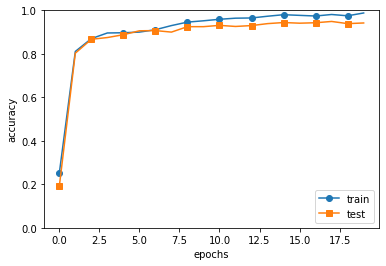

In [21]:
import sys
sys.path.append('/Users/yaelinjo/GitHub/deep-learning-from-scratch/master')
sys.path.append('/Users/yaelinjo/GitHub/deep-learning-from-scratch/master/ch07')
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
# (x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## CNN 시각화하기

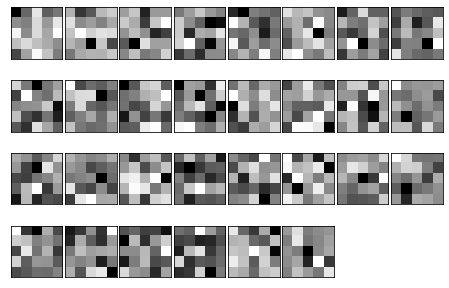

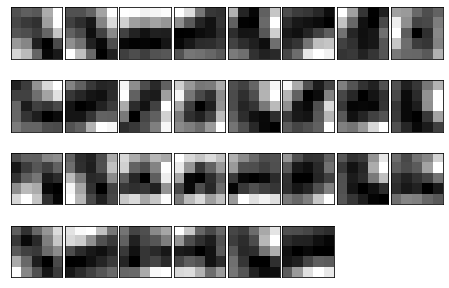

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

## 대표적인 CNN

* CNN의 원조인 LeNet(1988)
    * 합성곱 계층과 풀링 계층(정확히는 단순히 원소를 줄이기만 하는 서브샘플링 계층)을 반복
    * 마지막으로 완전연결 계층을 거치면서 결과 출력
    * 활성화 함수로 시그모이드 함수 사용(현재는 주로 ReLU)
    * 서브샘플링을 하여 중간 데이터의 크기를 줄임(현재는 최대 풀링 활용)
* 딥러닝이 주목받도록 이끈 AlexNet(2012)
    * LeNet에서 큰 구조는 바뀌지 않았다.
    * 활성화 함수로 ReLU 활용
    * LRN(local response normalization)이라는 국소적 정규화를 실시하는 계층 이용
    * 드롭아웃 사용